# TF Comparisson Plots

The following notebook is used to create the plots that compare all the different models used on the Transfer Learning Task

## Imports

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## Train - Test - Validation Accuracies

Lets plot the `best` model for each dataset. In total we have 3 models per dataset:

1. Best MobileNetV2 classification head
2. Best ConvNetBase classification head
3. Best MobileNetV2

In [2]:

train_data = {
    "Dataset" :  ['American Sign Language', 'Ajerbaijan Sign Language', 'Bengali Sign Language', 'Hagrid 10', 'Kenyan Sing Language', '27 Class Sign Language'],
    "MobileNetV2": [0.9997, 0.95, 0.97, 0.84, 0.85, 0.83],
    "ConvNetXtBase": [0.9994, 0.71, 0.90, 0.67, 0.77, 0.68],
    "Full MobileNetV2": [0, 0.92, 0.96, 0.97, 0.88, 0.97]
}

val_data = {
    "Dataset" :  ['American Sign Language', 'Ajerbaijan Sign Language', 'Bengali Sign Language', 'Hagrid 10', 'Kenyan Sing Language', '27 Class Sign Language'],
    "MobileNetV2": [0.9999, 0.69, 0.81, 0.67, 0.62, 0.83],
    "ConvNetXtBase": [1, 0.54, 0.75, 0.61, 0.56, 0.68],
    "Full MobileNetV2": [0, 0.90, 0.94, 0.96, 0.87, 0.98]
}

test_data = {
    "Dataset" :  ['American Sign Language', 'Ajerbaijan Sign Language', 'Bengali Sign Language', 'Hagrid 10', 'Kenyan Sing Language', '27 Class Sign Language'],
    "MobileNetV2": [0.9999, 0.62, 0.80, 0.65, 0.65, 0.85],
    "ConvNetXtBase": [0.9999, 0.51, 0.66, 0.61, 0.58, 0.74],
    "Full MobileNetV2": [0, 0.90, 0.94, 0.96, 0.88, 0.99]
}


train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)
test_df = pd.DataFrame(test_data)

train_df.head()
# First plot


,Dataset,MobileNetV2,ConvNetXtBase,Full MobileNetV2
0,American Sign Language,0.9997,0.9994,0.00
1,Ajerbaijan Sign Language,0.9500,0.7100,0.92
2,Bengali Sign Language,0.9700,0.9000,0.96
3,Hagrid 10,0.8400,0.6700,0.97
4,Kenyan Sing Language,0.8500,0.7700,0.88


In [3]:
train_df_melted = train_df.melt(id_vars='Dataset', 
                    value_vars=['MobileNetV2', 'ConvNetXtBase', 'Full MobileNetV2'],
                    var_name='Model', 
                    value_name='Accuracy')

val_df_melted = val_df.melt(id_vars='Dataset', 
                    value_vars=['MobileNetV2', 'ConvNetXtBase', 'Full MobileNetV2'],
                    var_name='Model', 
                    value_name='Accuracy')

test_df_melted = test_df.melt(id_vars='Dataset', 
                    value_vars=['MobileNetV2', 'ConvNetXtBase', 'Full MobileNetV2'],
                    var_name='Model', 
                    value_name='Accuracy')

train_df_melted.head()

,Dataset,Model,Accuracy
0,American Sign Language,MobileNetV2,0.9997
1,Ajerbaijan Sign Language,MobileNetV2,0.9500
2,Bengali Sign Language,MobileNetV2,0.9700
3,Hagrid 10,MobileNetV2,0.8400
4,Kenyan Sing Language,MobileNetV2,0.8500


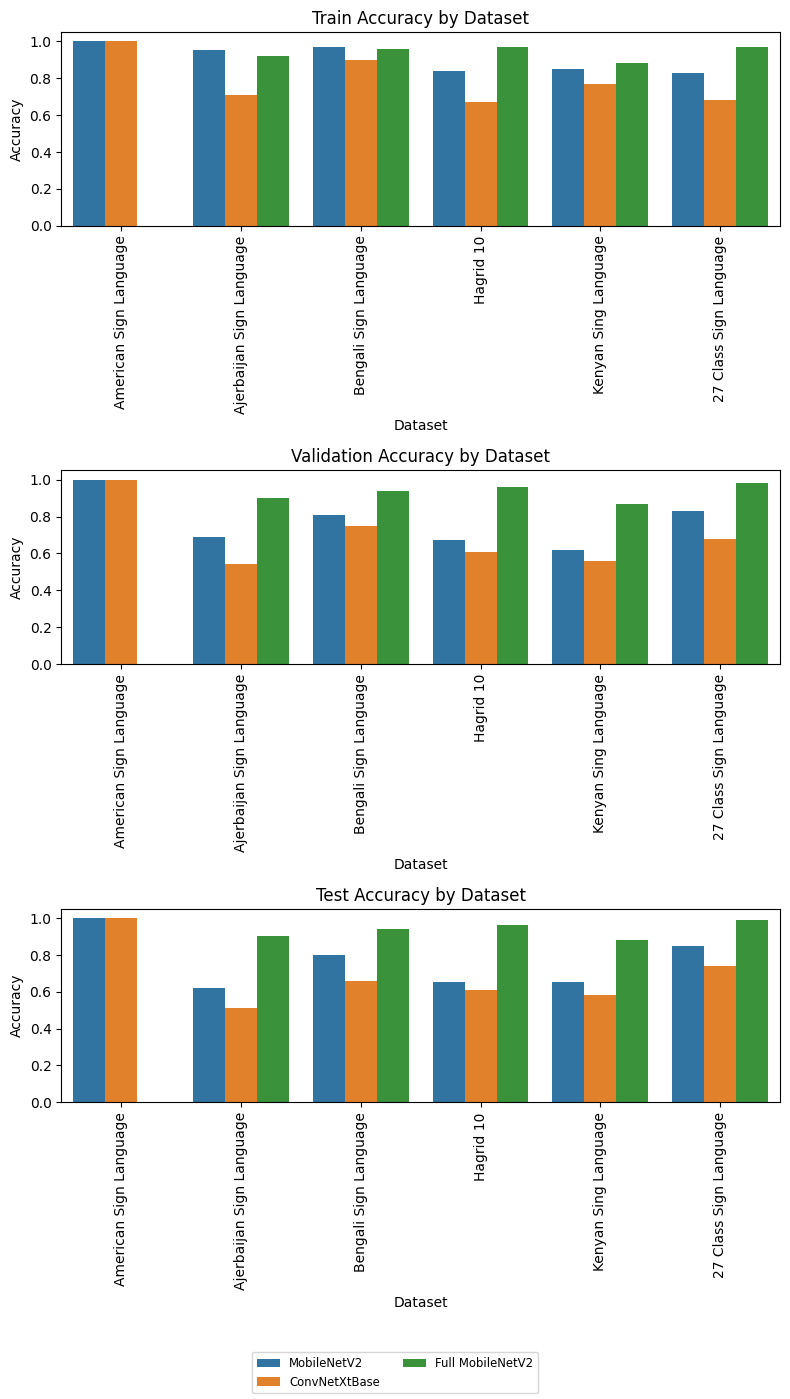

In [4]:
# Create 3 plots one bellow the other
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 14))

sns.barplot(data=train_df_melted, x='Dataset', y='Accuracy', hue='Model', ax=axes[0])
axes[0].set_title('Train Accuracy by Dataset')
axes[0].set_ylabel('Accuracy')
axes[0].get_legend().remove()

sns.barplot(data=val_df_melted, x='Dataset', y='Accuracy', hue='Model', ax=axes[1])
axes[1].set_title('Validation Accuracy by Dataset')
axes[1].set_ylabel('Accuracy')
axes[1].get_legend().remove()

sns.barplot(data=test_df_melted, x='Dataset', y='Accuracy', hue='Model', ax=axes[2])
axes[2].set_title('Test Accuracy by Dataset')
axes[2].set_ylabel('Accuracy')
axes[2].get_legend().remove()

# Rotate x-axis labels using the axes object
for label in axes[0].get_xticklabels():
    label.set_rotation(90)

for label in axes[1].get_xticklabels():
    label.set_rotation(90)

for label in axes[2].get_xticklabels():
    label.set_rotation(90)

handles, labels = axes[0].get_legend_handles_labels()  # Get handles and labels from the first plot
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize='small')

# Make labels smaller font
plt.rc('axes', labelsize=8)

# Allow some space at the bottom for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [17]:
train_val_loss = {
    "Dataset" :  ['American Sign Language', 'Ajerbaijan Sign Language', 'Bengali Sign Language', 'Hagrid 10', 'Kenyan Sing Language', '27 Class Sign Language'],
    "Train Loss" : [2.46e-4, 0.29, 0.14, 0.09, 0.42, 0.08],
    "Validation Loss" : [0.0034, 0.41, 0.26, 0.13, 0.41, 0.09],
}

df = pd.DataFrame(train_val_loss)

df.head()

,Dataset,Train Loss,Validation Loss
0,American Sign Language,0.000246,0.0034
1,Ajerbaijan Sign Language,0.290000,0.4100
2,Bengali Sign Language,0.140000,0.2600
3,Hagrid 10,0.090000,0.1300
4,Kenyan Sing Language,0.420000,0.4100


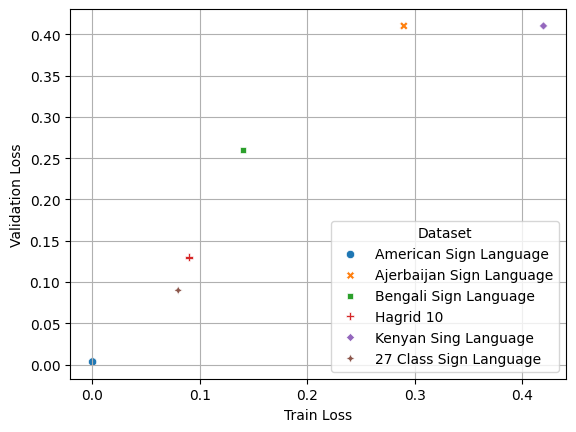

In [19]:
import numpy as np

sns.scatterplot(data=df, x="Train Loss", y="Validation Loss", hue="Dataset", style="Dataset")
plt.grid()
plt.show()

In [21]:
print(1.6976e-04)

0.00016976
